<h1>Pie-Chart<h1>

In [1]:
pip install gspread oauth2client df2gspread


  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
    Running setup.py install for df2gspread: started
    Running setup.py install for df2gspread: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install -U matplotlib

  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\python\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [109]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# For connect to google sheet
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g
import matplotlib.pyplot as plt

In [110]:
scope = ["https://spreadsheets.google.com/feeds",'https://www.googleapis.com/auth/spreadsheets',"https://www.googleapis.com/auth/drive.file","https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name("WifiSniffer-28b7979a8d5a.json", scope)

client = gspread.authorize(creds)

# The sprad sheet ID, which can be taken from the link to the sheet
spreadsheet_key = '10iAEieiijvG5gXad0wtfoUQP1jDMI4iGE5uq4x743-4'

In [111]:
sheet = client.open("WifiSniffer").sheet1

In [112]:
df = pd.DataFrame(sheet.get_all_records())

In [113]:
df.head()

,MacId,VendorName,FirstSeen,LastSeen,Count
0,E0:D0:83:95:63:69,"Samsung Electronics Co.,Ltd",2019-12-11 15:23:27,2019-12-11 17:45:39,7
1,6C:00:6B:53:3D:59,"Samsung Electronics Co.,Ltd",2019-12-11 15:23:24,2019-12-11 17:22:19,2
2,DA:A1:19:EE:3A:0E,Others,2019-12-11 15:23:26,2019-12-11 15:23:26,1
3,A8:DB:03:3F:28:3C,SAMSUNG ELECTRO-MECHANICS(THAILAND),2019-12-11 15:23:28,2019-12-11 17:47:09,6
4,DC:F5:05:DA:2F:93,AzureWave Technology Inc.,2019-12-11 15:23:24,2019-12-11 17:49:10,17


In [114]:
values_list = pd.DataFrame(sheet.col_values(2))

In [115]:
values_list.head()

,0
0,VendorName
1,"Samsung Electronics Co.,Ltd"
2,"Samsung Electronics Co.,Ltd"
3,Others
4,SAMSUNG ELECTRO-MECHANICS(THAILAND)


In [116]:
from collections import Counter

c = Counter(list(zip(df.VendorName)))

In [117]:
c

Counter({('Samsung Electronics Co.,Ltd',): 24,
         ('Others',): 125,
         ('SAMSUNG ELECTRO-MECHANICS(THAILAND)',): 14,
         ('AzureWave Technology Inc.',): 18,
         ('Raspberry Pi Foundation',): 14,
         ('CyberTAN Technology Inc.',): 16,
         ('Hon Hai Precision Ind. Co.,Ltd.',): 43,
         ('TP-LINK TECHNOLOGIES CO.,LTD.',): 16,
         ('Xiaomi Communications Co Ltd',): 28,
         ('Intel Corporate',): 16,
         ('CHONGQING FUGUI ELECTRONICS CO.,LTD.',): 1,
         ('vivo Mobile Communication Co., Ltd.',): 6,
         (' Wingtech Group (HongKong）Limited',): 1,
         ('Liteon Technology Corporation',): 3,
         ('GUANGDONG OPPO MOBILE TELECOMMUNICATIONS CORP.,LTD',): 4,
         ('Apple, Inc.',): 2,
         ('Motorola Mobility LLC, a Lenovo Company',): 1,
         ('OnePlus Technology (Shenzhen) Co., Ltd',): 1,
         ('Matsushita Electronic Components (Europe) GmbH',): 2})

In [118]:
for col in df.columns: 
    print(col) 

MacId
VendorName
FirstSeen
LastSeen
Count


In [119]:
print(df.columns)

Index(['MacId', 'VendorName', 'FirstSeen', 'LastSeen', 'Count'], dtype='object')


In [120]:
df['VendorName']

0              Samsung Electronics Co.,Ltd
1              Samsung Electronics Co.,Ltd
2                                   Others
3      SAMSUNG ELECTRO-MECHANICS(THAILAND)
4                AzureWave Technology Inc.
                      ...                 
330                Raspberry Pi Foundation
331              AzureWave Technology Inc.
332                                 Others
333            Samsung Electronics Co.,Ltd
334                        Intel Corporate
Name: VendorName, Length: 335, dtype: object

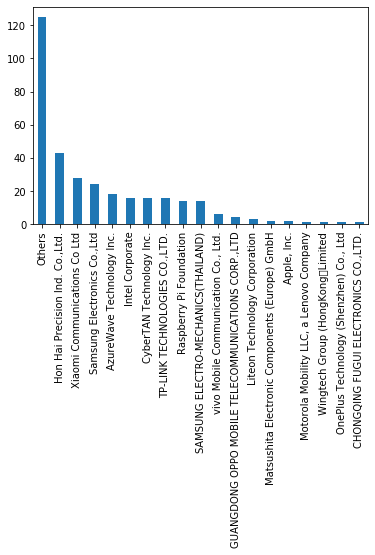

In [130]:
df.VendorName.value_counts().plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000222FC290A20>],
      dtype=object)

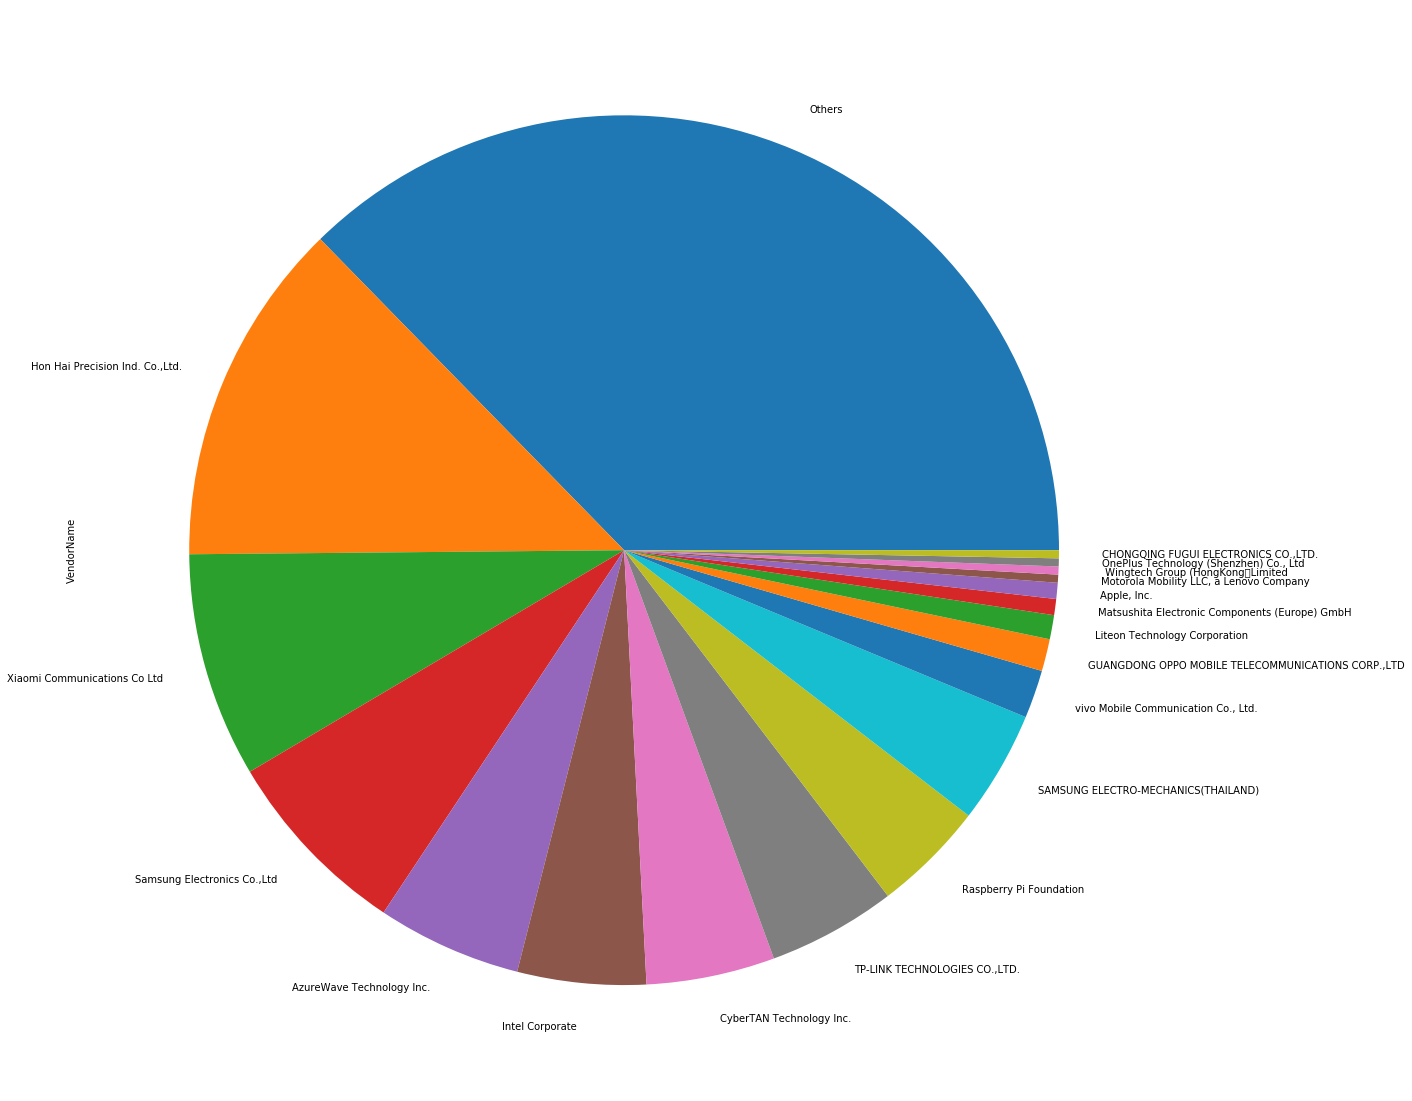

In [129]:
df.VendorName.value_counts().plot.pie(subplots=True,figsize=(200, 20))
#df.plot.pie(subplots=True,figsize=(8, 3))